In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Sales.csv')
df.sample(frac=1)

,InvoiceID,Date,Year,CustomerID,CustomerName,Gender,Age,Country,Region,StoreID,...,Category,SubCategory,Quantity,UnitPrice,Discount,TotalPrice,Cost,Profit,PaymentMethod,OrderStatus
6823,INV006824,2022-04-19,2022,CUST1799,Kristopher Walker,Other,38,Canada,North America,STR725,...,Electronics,Smartphones,9,11.32,19.11,82.77,64.66,18.11,EMI,Cancelled
15748,INV015749,2021-12-26,2021,CUST2579,Melissa Anderson,Other,31,UK,Europe,STR508,...,Home,Kitchen,5,787.03,116.80,3818.35,3203.23,615.12,Cash,Returned
5314,INV005315,2022-08-21,2022,CUST2084,James Cohen,Male,60,Canada,North America,STR476,...,Beauty,Skincare,8,62.71,21.68,480.00,334.81,145.19,Card,Completed
40171,INV040172,2021-07-03,2021,CUST9737,Patricia Smith,Male,19,USA,North America,STR310,...,Sports,Fitness,4,485.13,313.91,1626.61,1235.25,391.36,EMI,Cancelled
36982,INV036983,2021-01-26,2021,CUST2376,Robert Boyle,Female,42,South Africa,Africa,STR855,...,Apparel,Men Clothing,9,20.45,33.48,150.57,99.30,51.27,NetBanking,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30972,INV030973,2020-08-18,2020,CUST8907,Matthew Jackson,Female,65,Australia,Oceania,STR368,...,Beauty,Fragrance,9,718.86,640.29,5829.45,4242.81,1586.64,Cash,Returned
22993,INV022994,2022-05-21,2022,CUST4675,Heather Perez,Female,40,Canada,North America,STR565,...,Sports,Outdoor,7,386.34,324.84,2379.54,1777.60,601.94,Card,Completed
13600,INV013601,2023-01-29,2023,CUST8534,Lisa Decker,Other,54,Brazil,South America,STR703,...,Apparel,Women Clothing,1,434.99,80.57,354.42,300.05,54.37,Card,Returned
37976,INV037977,2022-01-29,2022,CUST9793,Gene Castillo,Female,23,Canada,North America,STR583,...,Home,Decor,1,273.31,29.68,243.63,164.51,79.12,NetBanking,Completed


In [3]:
df.columns

Index(['InvoiceID', 'Date', 'Year', 'CustomerID', 'CustomerName', 'Gender',
       'Age', 'Country', 'Region', 'StoreID', 'StoreLocation', 'SalesRep',
       'ProductID', 'ProductName', 'Category', 'SubCategory', 'Quantity',
       'UnitPrice', 'Discount', 'TotalPrice', 'Cost', 'Profit',
       'PaymentMethod', 'OrderStatus'],
      dtype='object')

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['InvoiceID'].unique()

array(['INV000001', 'INV000002', 'INV000003', ..., 'INV045985',
       'INV045986', 'INV045987'], dtype=object)

In [6]:
df['InvoiceID'].nunique()

45987

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45987 entries, 0 to 45986
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceID      45987 non-null  object 
 1   Date           45987 non-null  object 
 2   Year           45987 non-null  int64  
 3   CustomerID     45987 non-null  object 
 4   CustomerName   45987 non-null  object 
 5   Gender         45987 non-null  object 
 6   Age            45987 non-null  int64  
 7   Country        45987 non-null  object 
 8   Region         45987 non-null  object 
 9   StoreID        45987 non-null  object 
 10  StoreLocation  45987 non-null  object 
 11  SalesRep       45987 non-null  object 
 12  ProductID      45987 non-null  object 
 13  ProductName    45987 non-null  object 
 14  Category       45987 non-null  object 
 15  SubCategory    45987 non-null  object 
 16  Quantity       45987 non-null  int64  
 17  UnitPrice      45987 non-null  float64
 18  Discou

In [8]:
df['Discount'].nunique()

31277

<Axes: ylabel='count'>

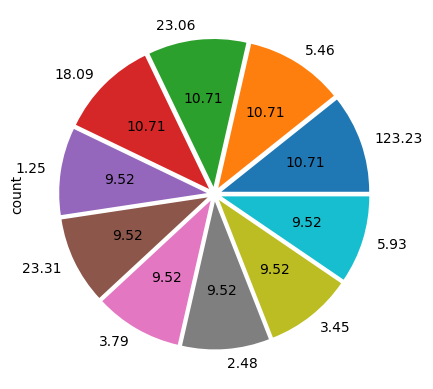

In [9]:
df['Discount'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%.2f',explode=[0.05]*10)

<Axes: ylabel='count'>

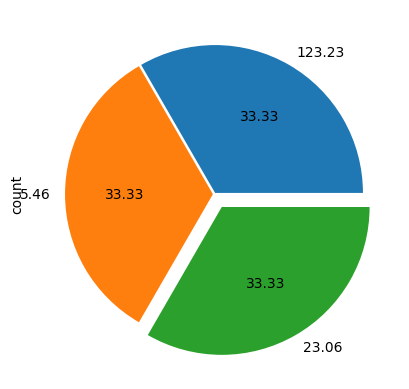

In [10]:
#top 10 discount offered
df['Discount'].value_counts().sort_values(ascending=False).head(3).plot(kind='pie',autopct='%.2f',explode=[0.01,0.01,0.1])

In [11]:
'''
1. Data Loading.
2. Checking Descreptive Statistics
3. Check if any null value present
4. Bi Variate Analysis
5. Data Scaling and Normalization, Very IMP column
6. Checking for data balancing -----> Classification and Recommendation
7. Model Building.

bi variate analyis can be done using two ways : 1)Graphical Ways 2)Groupby function and Crosstab
'''

df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45987 entries, 0 to 45986
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceID      45987 non-null  object        
 1   Date           45987 non-null  datetime64[ns]
 2   Year           45987 non-null  int32         
 3   CustomerID     45987 non-null  object        
 4   CustomerName   45987 non-null  object        
 5   Gender         45987 non-null  object        
 6   Age            45987 non-null  int64         
 7   Country        45987 non-null  object        
 8   Region         45987 non-null  object        
 9   StoreID        45987 non-null  object        
 10  StoreLocation  45987 non-null  object        
 11  SalesRep       45987 non-null  object        
 12  ProductID      45987 non-null  object        
 13  ProductName    45987 non-null  object        
 14  Category       45987 non-null  object        
 15  SubCategory    4598

<Axes: xlabel='Year,Quantity'>

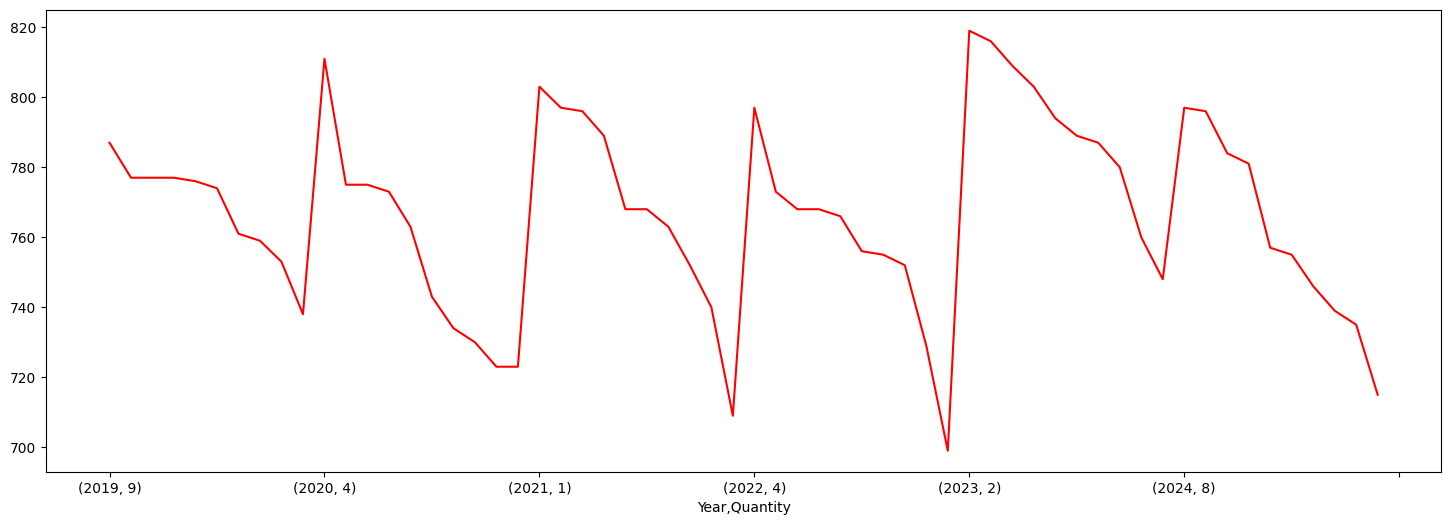

In [14]:
plt.figure(figsize=(18,6))
df.groupby('Year')['Quantity'].value_counts().plot(kind='line',color = 'red')

<Axes: xlabel='Region,Quantity'>

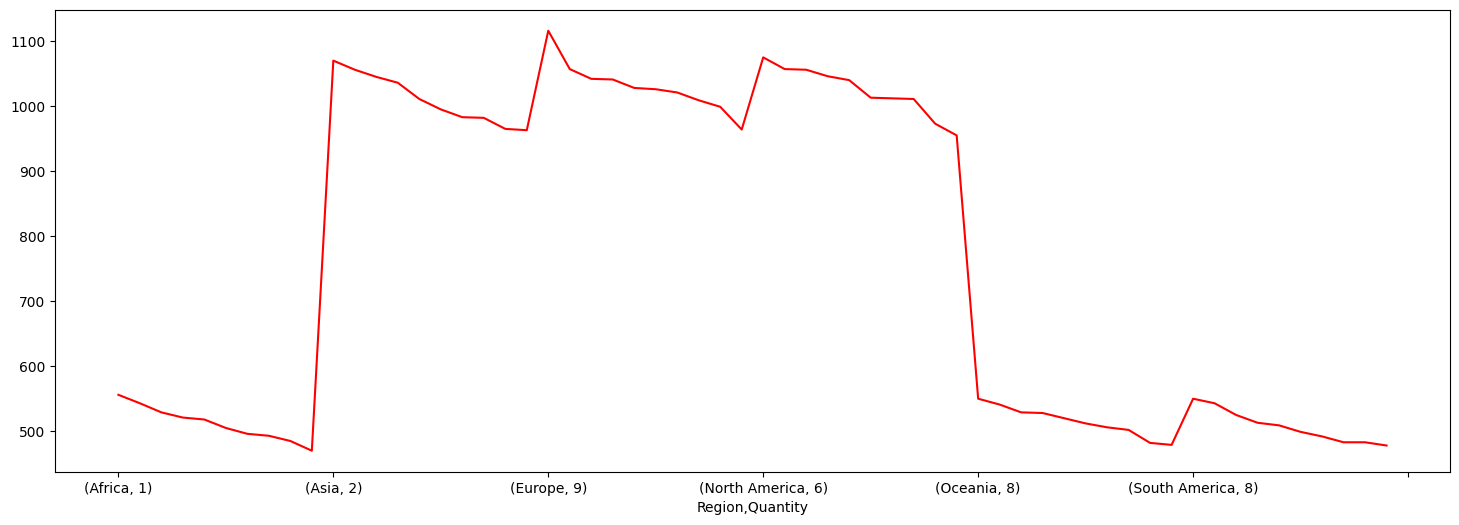

In [15]:
#Region Vs Quantity
plt.figure(figsize=(18,6))
df.groupby('Region')['Quantity'].value_counts().plot(kind='line',color='red')

In [16]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

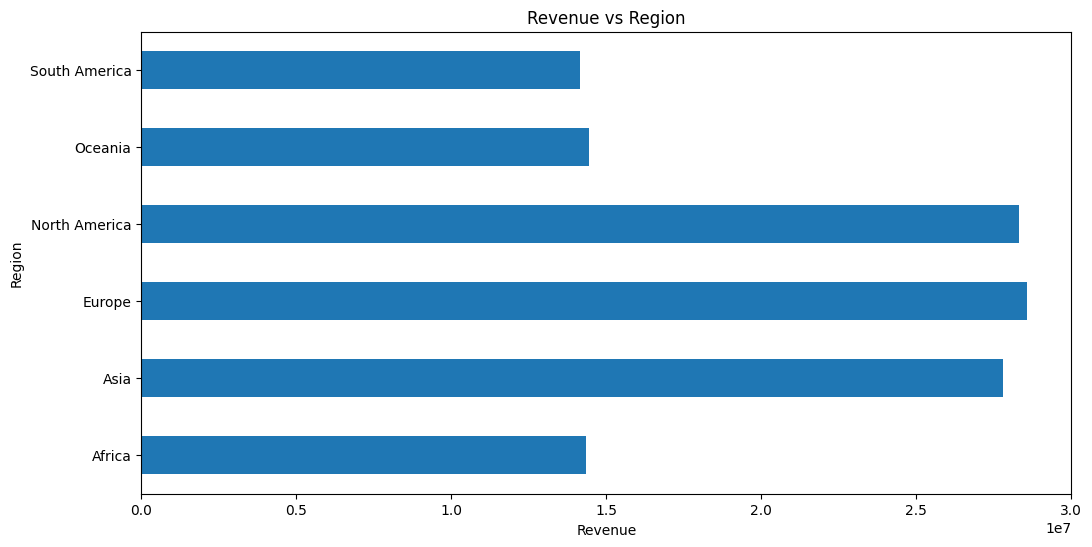

In [17]:
plt.figure(figsize=(12, 6))
df.groupby('Region')['Revenue'].sum().plot(kind='barh')
plt.xlabel('Revenue')
plt.ylabel('Region')
plt.title('Revenue vs Region')
plt.show()


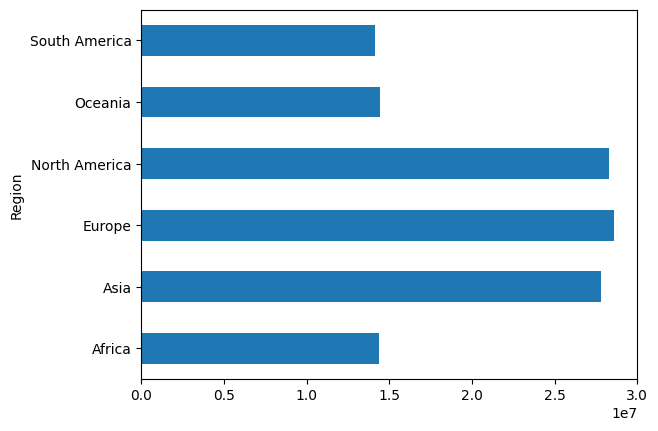

In [18]:
df.groupby('Region')['Revenue'].sum().plot(kind='barh');